## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 259us/step - loss: 2.2759 - accuracy: 0.1536 - val_loss: 2.2237 - val_accuracy: 0.2051
Epoch 2/500
50000/50000 [==============================] - 10s 194us/step - loss: 2.1904 - accuracy: 0.2218 - val_loss: 2.1536 - val_accuracy: 0.2483
Epoch 3/500
50000/50000 [==============================] - 9s 177us/step - loss: 2.1276 - accuracy: 0.2563 - val_loss: 2.1001 - val_accuracy: 0.2714
Epoch 4/500
50000/50000 [==============================] - 10s 193us/step - loss: 2.0797 - accuracy: 0.2747 - val_loss: 2.0574 - val_accuracy: 0.2870
Epoch 5/500
50000/50000 [==============================] - 10s 192us/step - loss: 2.0409 - accuracy: 0.2877 - val_loss: 2.0230 - val_accuracy: 0.3008
Epoch 6/500
50000/50000 [==============================] - 9s 178us/step - loss: 2.0092 - accuracy: 0.2995 - val_loss: 1.9952 - val_accuracy: 0.3089
Epoch 7/500
50000/50000 [===========================

50000/50000 [==============================] - 9s 171us/step - loss: 1.6590 - accuracy: 0.4227 - val_loss: 1.6671 - val_accuracy: 0.4149
Epoch 56/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.6561 - accuracy: 0.4244 - val_loss: 1.6617 - val_accuracy: 0.4182
Epoch 57/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.6528 - accuracy: 0.4266 - val_loss: 1.6591 - val_accuracy: 0.4174
Epoch 58/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6497 - accuracy: 0.4268 - val_loss: 1.6566 - val_accuracy: 0.4200
Epoch 59/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.6470 - accuracy: 0.4285 - val_loss: 1.6557 - val_accuracy: 0.4202
Epoch 60/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.6440 - accuracy: 0.4295 - val_loss: 1.6528 - val_accuracy: 0.4198
Epoch 61/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6411 - accuracy: 0.4300 - val

50000/50000 [==============================] - 8s 167us/step - loss: 1.5275 - accuracy: 0.4666 - val_loss: 1.5500 - val_accuracy: 0.4541
Epoch 110/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.5257 - accuracy: 0.4666 - val_loss: 1.5475 - val_accuracy: 0.4547
Epoch 111/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.5238 - accuracy: 0.4682 - val_loss: 1.5470 - val_accuracy: 0.4549
Epoch 112/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.5221 - accuracy: 0.4697 - val_loss: 1.5455 - val_accuracy: 0.4554
Epoch 113/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.5195 - accuracy: 0.4696 - val_loss: 1.5460 - val_accuracy: 0.4540
Epoch 114/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5182 - accuracy: 0.4703 - val_loss: 1.5429 - val_accuracy: 0.4563
Epoch 115/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.5161 - accuracy: 0.4713

50000/50000 [==============================] - 8s 169us/step - loss: 1.4368 - accuracy: 0.4963 - val_loss: 1.4817 - val_accuracy: 0.4791
Epoch 164/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.4349 - accuracy: 0.4975 - val_loss: 1.4795 - val_accuracy: 0.4779
Epoch 165/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.4340 - accuracy: 0.4986 - val_loss: 1.4798 - val_accuracy: 0.4767
Epoch 166/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.4327 - accuracy: 0.4966 - val_loss: 1.4803 - val_accuracy: 0.4760
Epoch 167/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.4307 - accuracy: 0.4981 - val_loss: 1.4773 - val_accuracy: 0.4770
Epoch 168/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4294 - accuracy: 0.5004 - val_loss: 1.4840 - val_accuracy: 0.4751
Epoch 169/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.4280 - accuracy: 0.499

50000/50000 [==============================] - 9s 172us/step - loss: 1.3607 - accuracy: 0.5238 - val_loss: 1.4393 - val_accuracy: 0.4904
Epoch 218/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.3591 - accuracy: 0.5249 - val_loss: 1.4316 - val_accuracy: 0.4920
Epoch 219/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.3586 - accuracy: 0.5242 - val_loss: 1.4310 - val_accuracy: 0.4942
Epoch 220/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.3564 - accuracy: 0.5250 - val_loss: 1.4344 - val_accuracy: 0.4931
Epoch 221/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.3549 - accuracy: 0.5251 - val_loss: 1.4412 - val_accuracy: 0.4915
Epoch 222/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.3540 - accuracy: 0.5252 - val_loss: 1.4263 - val_accuracy: 0.4948
Epoch 223/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.3522 - accuracy: 0.5273

50000/50000 [==============================] - 9s 174us/step - loss: 1.2950 - accuracy: 0.5454 - val_loss: 1.4033 - val_accuracy: 0.5014
Epoch 272/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.2927 - accuracy: 0.5468 - val_loss: 1.4103 - val_accuracy: 0.4988
Epoch 273/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2915 - accuracy: 0.5471 - val_loss: 1.3927 - val_accuracy: 0.5071
Epoch 274/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2901 - accuracy: 0.5472 - val_loss: 1.3980 - val_accuracy: 0.5032
Epoch 275/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2889 - accuracy: 0.5494 - val_loss: 1.3981 - val_accuracy: 0.5007
Epoch 276/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2871 - accuracy: 0.5500 - val_loss: 1.4026 - val_accuracy: 0.4988
Epoch 277/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.2867 - accuracy: 0.5493

50000/50000 [==============================] - 9s 177us/step - loss: 1.2323 - accuracy: 0.5688 - val_loss: 1.3710 - val_accuracy: 0.5141
Epoch 326/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2313 - accuracy: 0.5686 - val_loss: 1.3727 - val_accuracy: 0.5148
Epoch 327/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.2305 - accuracy: 0.5677 - val_loss: 1.3867 - val_accuracy: 0.5085
Epoch 328/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.2298 - accuracy: 0.5688 - val_loss: 1.3712 - val_accuracy: 0.5147
Epoch 329/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.2283 - accuracy: 0.5690 - val_loss: 1.3748 - val_accuracy: 0.5109
Epoch 330/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2270 - accuracy: 0.5700 - val_loss: 1.3777 - val_accuracy: 0.5049
Epoch 331/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.2271 - accuracy: 0.5695

50000/50000 [==============================] - 9s 177us/step - loss: 1.1745 - accuracy: 0.5895 - val_loss: 1.3638 - val_accuracy: 0.5210
Epoch 380/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.1738 - accuracy: 0.5894 - val_loss: 1.3581 - val_accuracy: 0.5184
Epoch 381/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1732 - accuracy: 0.5890 - val_loss: 1.3491 - val_accuracy: 0.5221
Epoch 382/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1716 - accuracy: 0.5897 - val_loss: 1.3538 - val_accuracy: 0.5212
Epoch 383/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1722 - accuracy: 0.5890 - val_loss: 1.3691 - val_accuracy: 0.5157
Epoch 384/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.1710 - accuracy: 0.5891 - val_loss: 1.3469 - val_accuracy: 0.5211
Epoch 385/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.1686 - accuracy: 0.5912

50000/50000 [==============================] - 9s 177us/step - loss: 1.1185 - accuracy: 0.6095 - val_loss: 1.3755 - val_accuracy: 0.5204
Epoch 434/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.1206 - accuracy: 0.6072 - val_loss: 1.3419 - val_accuracy: 0.5259
Epoch 435/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.1167 - accuracy: 0.6080 - val_loss: 1.3564 - val_accuracy: 0.5175
Epoch 436/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.1171 - accuracy: 0.6078 - val_loss: 1.3960 - val_accuracy: 0.5099
Epoch 437/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.1171 - accuracy: 0.6091 - val_loss: 1.3702 - val_accuracy: 0.5199
Epoch 438/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.1137 - accuracy: 0.6112 - val_loss: 1.3580 - val_accuracy: 0.5217
Epoch 439/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.1127 - accuracy: 0.61

50000/50000 [==============================] - 9s 175us/step - loss: 1.0666 - accuracy: 0.6269 - val_loss: 1.3374 - val_accuracy: 0.5237
Epoch 488/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.0649 - accuracy: 0.6287 - val_loss: 1.3644 - val_accuracy: 0.5249
Epoch 489/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.0639 - accuracy: 0.6292 - val_loss: 1.3314 - val_accuracy: 0.5306
Epoch 490/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0627 - accuracy: 0.6275 - val_loss: 1.3403 - val_accuracy: 0.5293
Epoch 491/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.0605 - accuracy: 0.6287 - val_loss: 1.3440 - val_accuracy: 0.5281
Epoch 492/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.0601 - accuracy: 0.6297 - val_loss: 1.3486 - val_accuracy: 0.5249
Epoch 493/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.0589 - accuracy: 0.6315

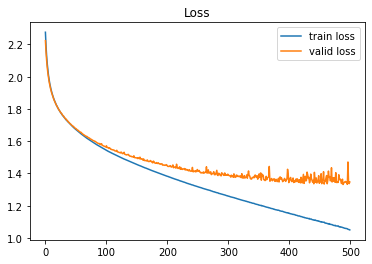

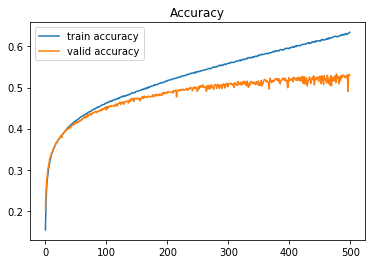

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()